# Performance metrics from scratch


## Classification performance metrics
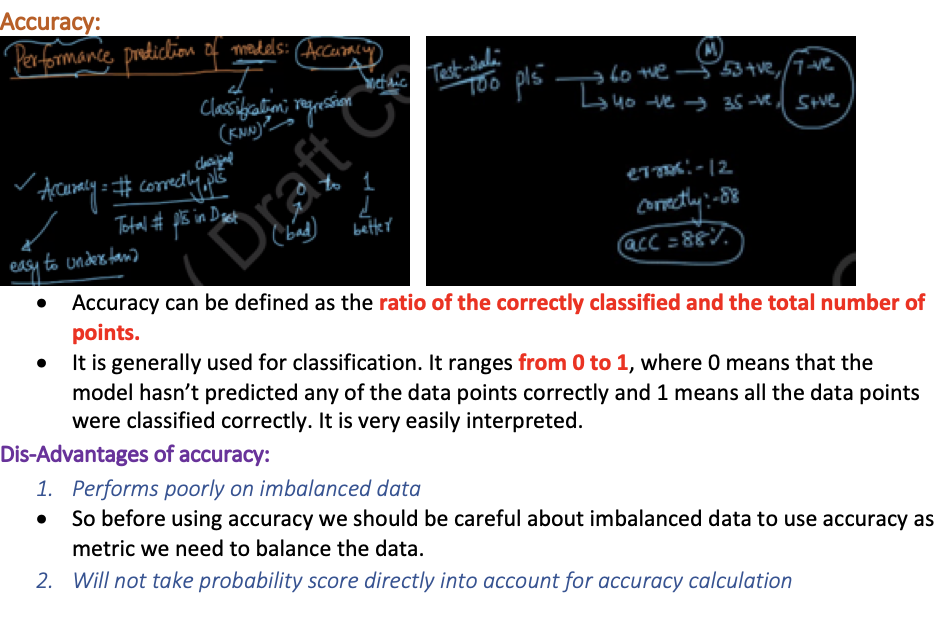

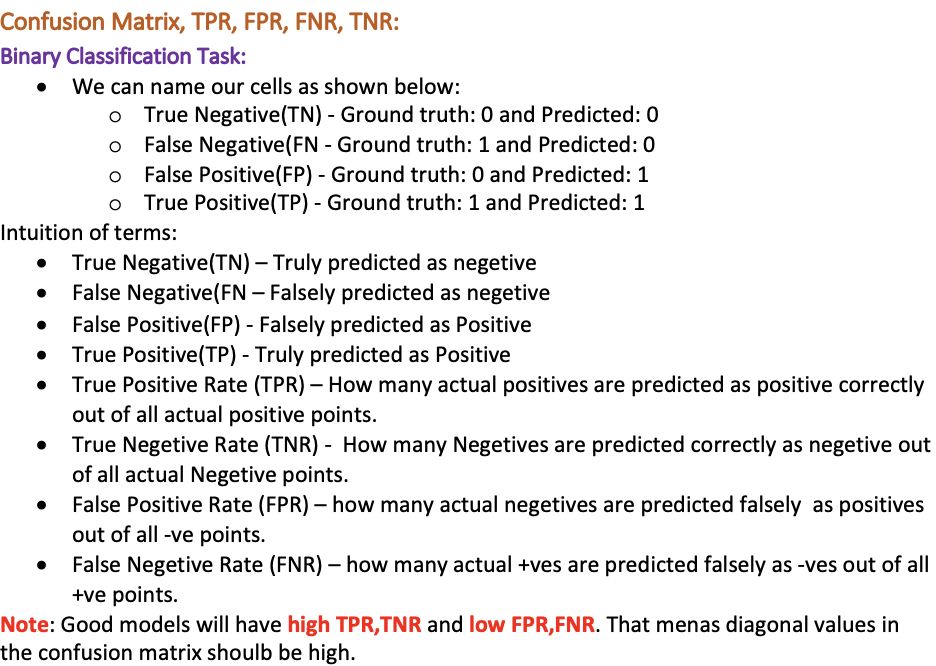

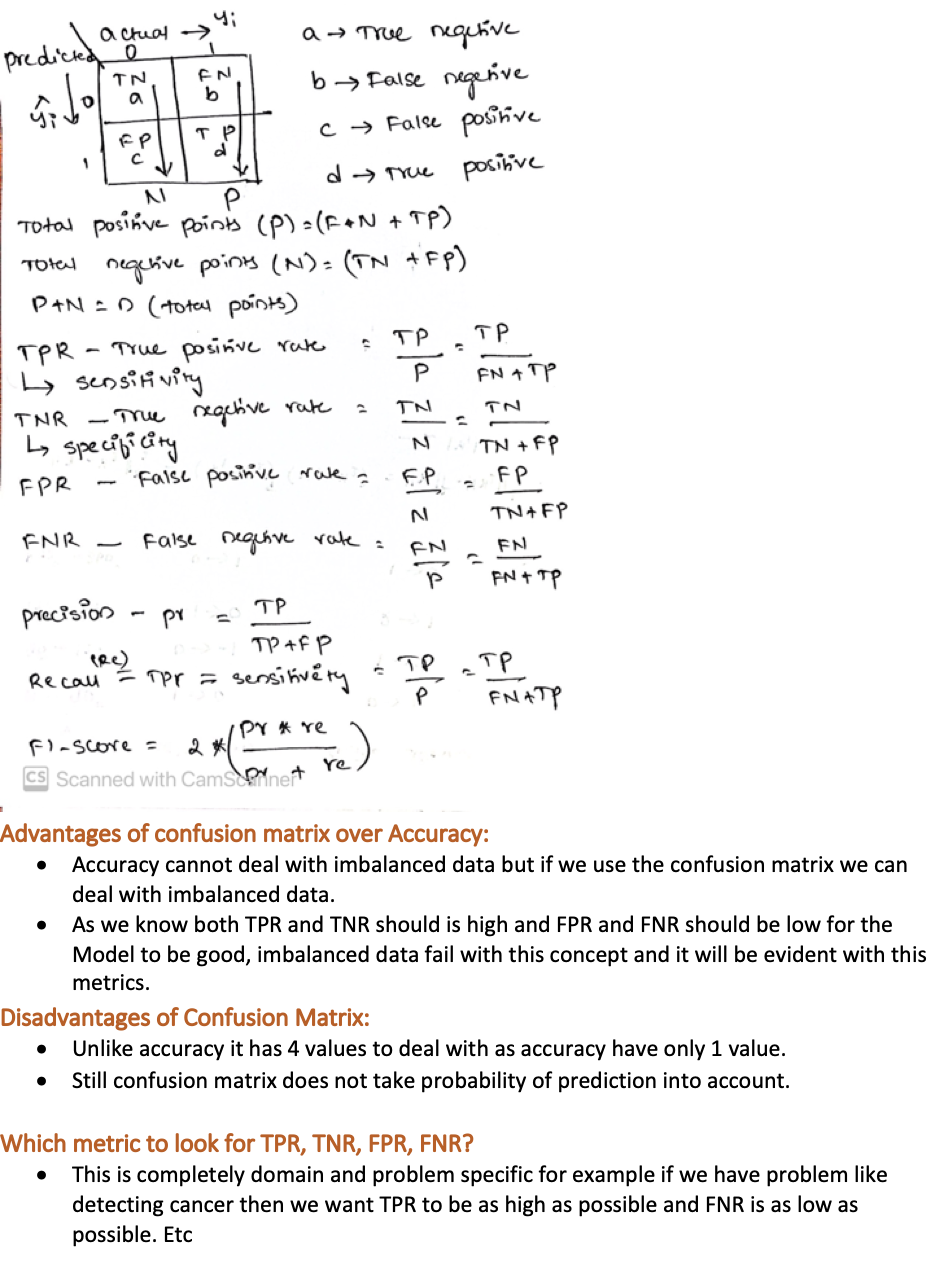

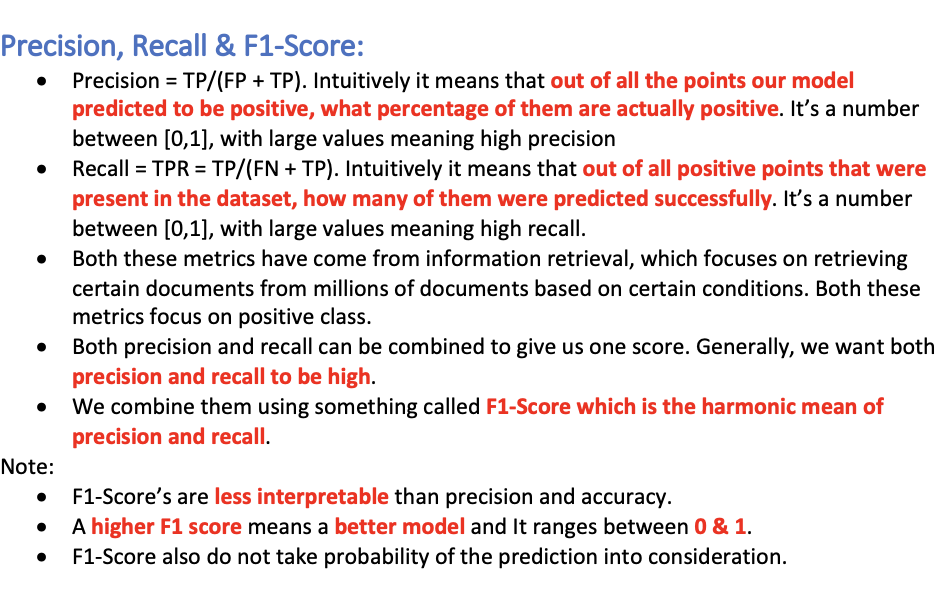

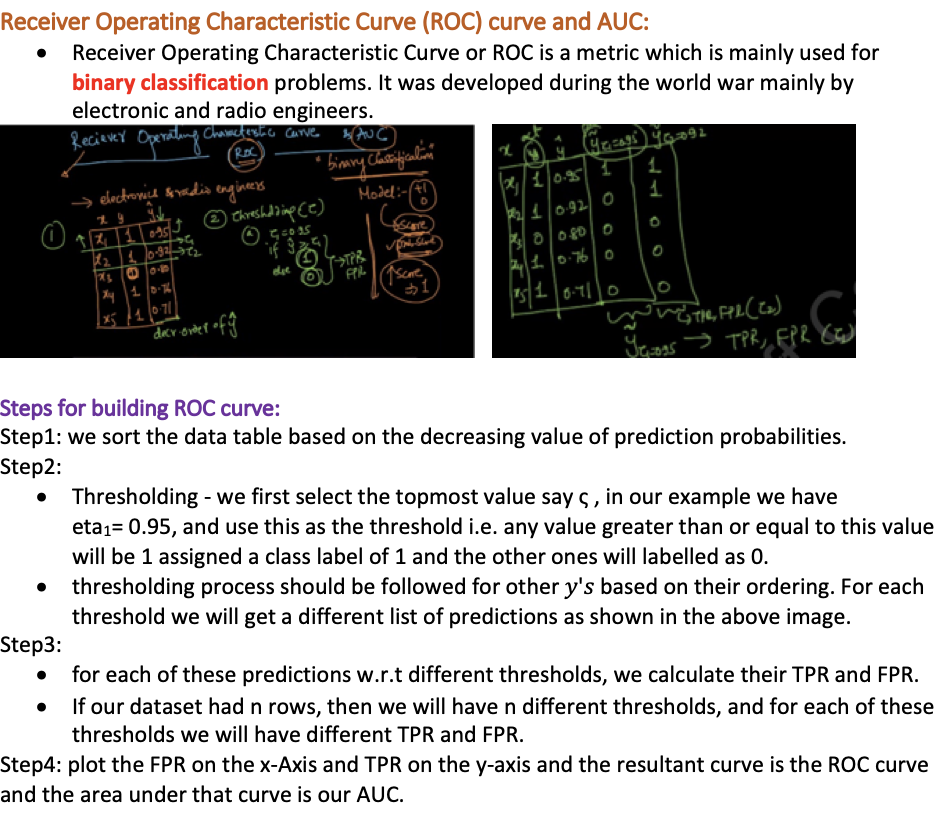

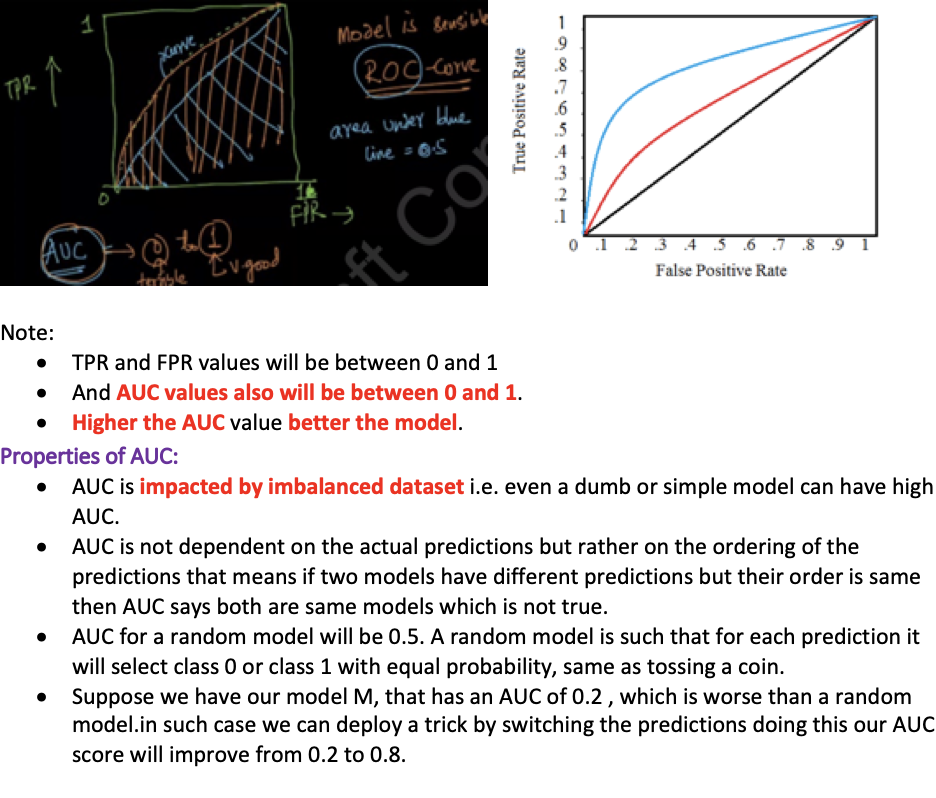

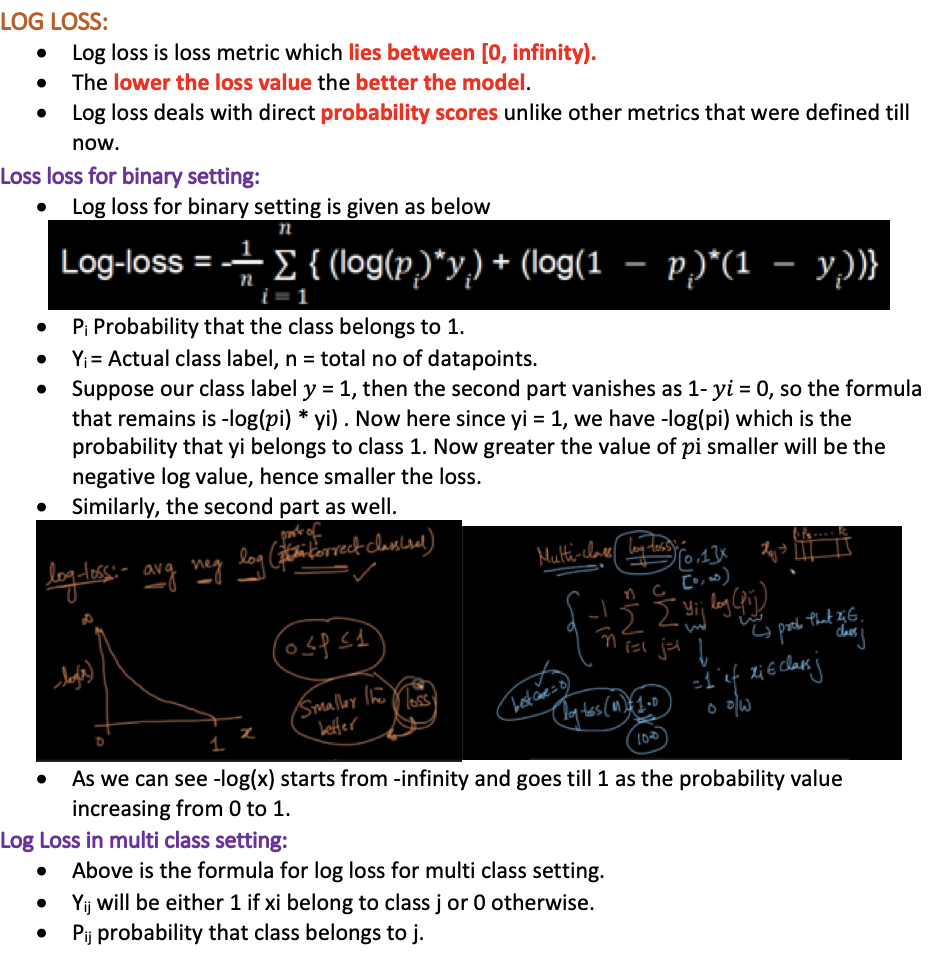

## Regression Performance Metrics

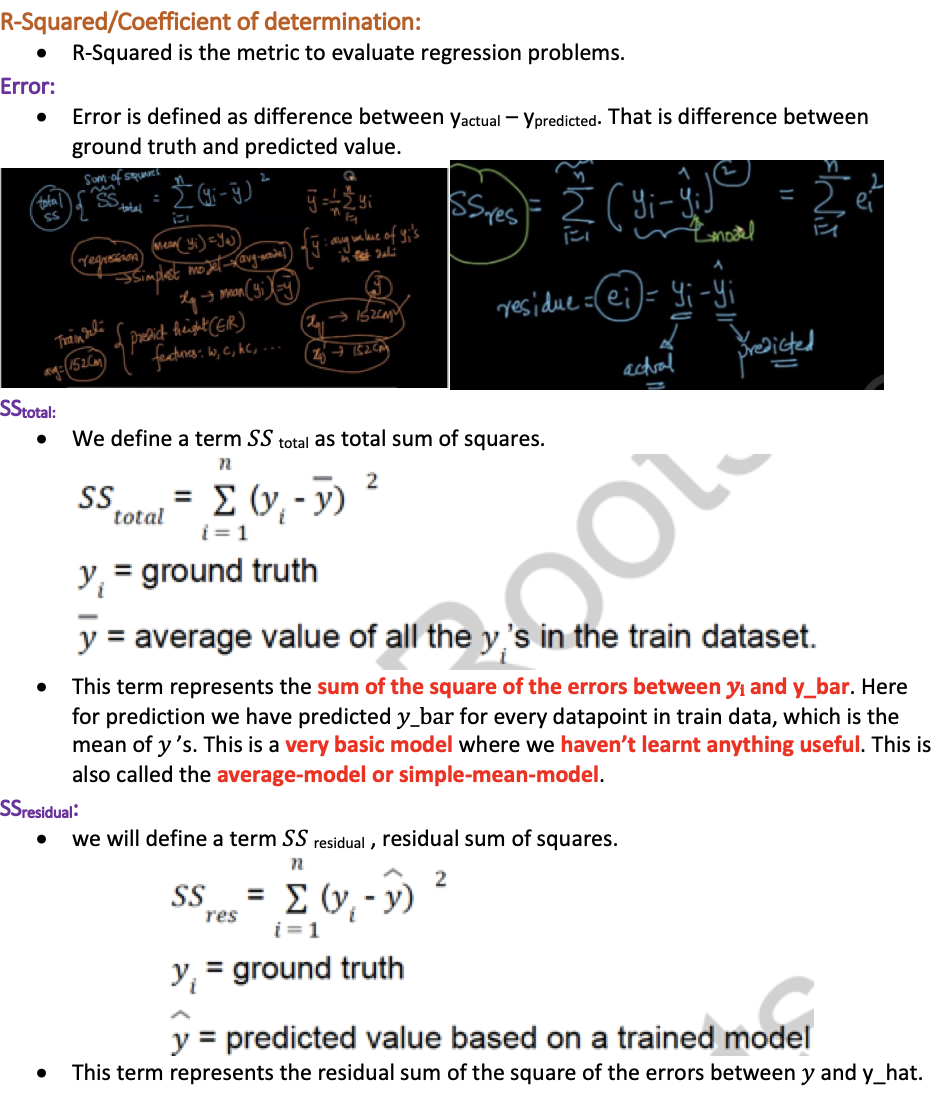

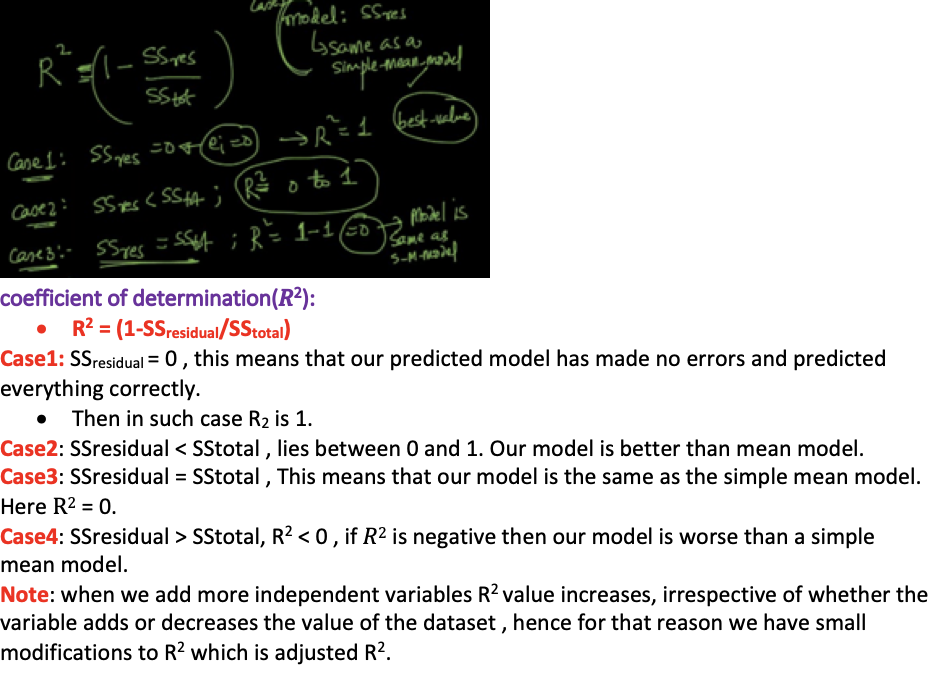

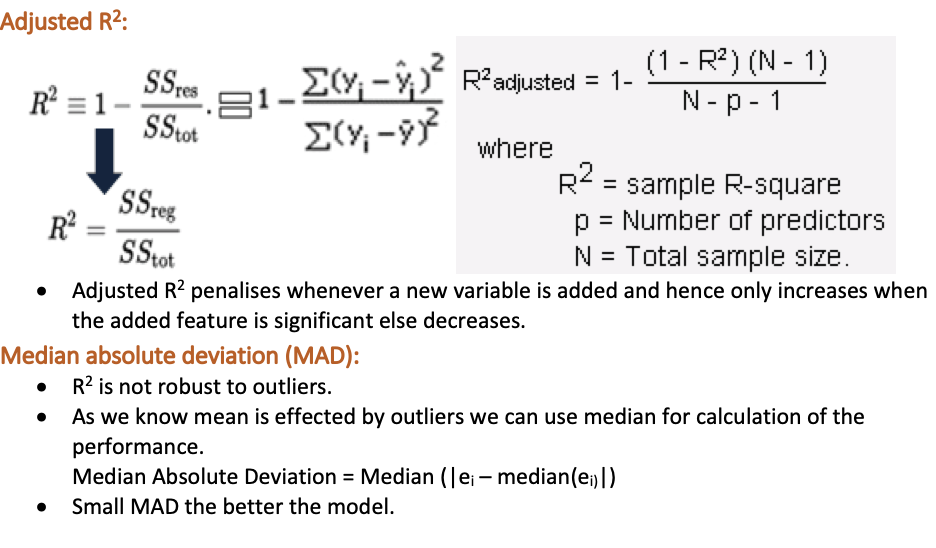

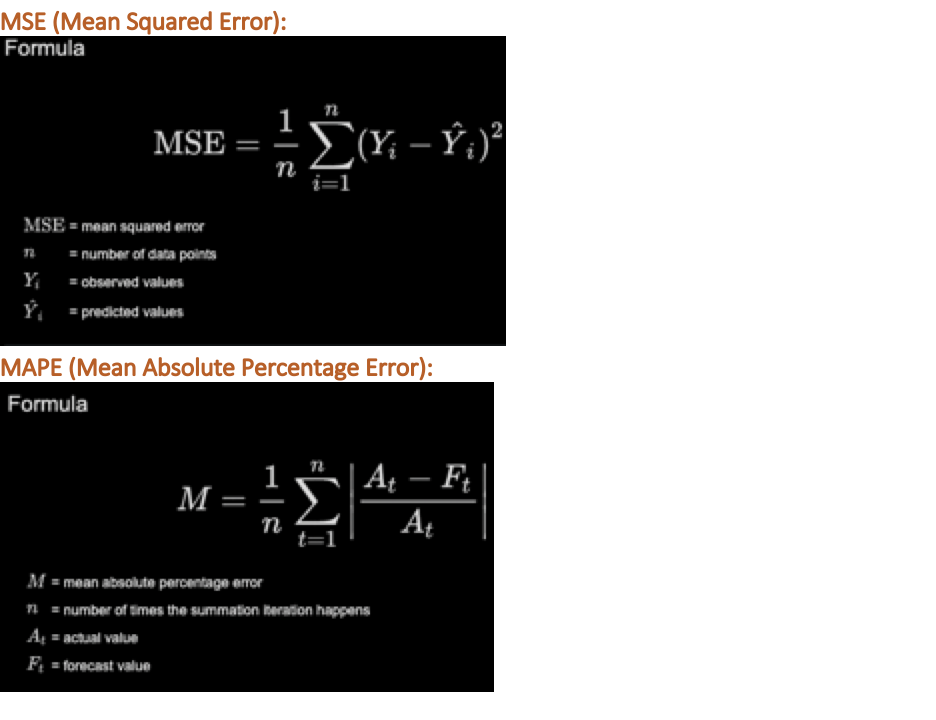

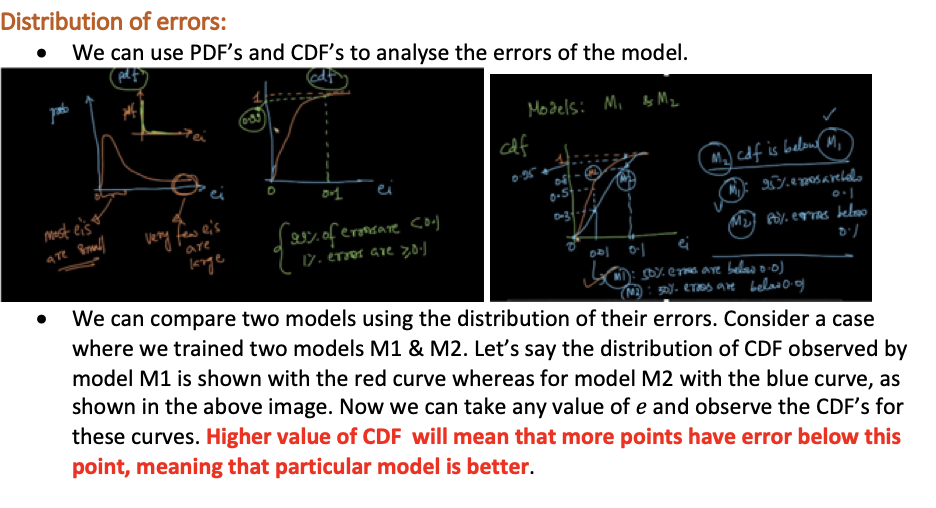

# lets implement classification metrics from scratch

In [4]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
data=pd.read_csv("/content/drive/MyDrive/Performance_Metrics/Classification_sample.csv")
data.shape

(1612, 2)

In [36]:
data

y      prob
0     0  0.458521
1     0  0.505037
2     0  0.418652
3     0  0.412057
4     0  0.375579
...  ..       ...
1607  1  0.416593
1608  1  0.373694
1609  1  0.141031
1610  1  0.219400
1611  1  0.647453

[1612 rows x 2 columns]

In [33]:
data['y'].value_counts()

0    1012
1     600
Name: y, dtype: int64

In [63]:
def predict(df,y,thresh_hold):
    y_pred=[]
    for label in df[y]:
        if label<thresh_hold:
            y_pred.append(0)
        else:
            y_pred.append(1)
    return y_pred
    
    
# confusion matrix
def cal_vals(df,y,y_pred):
    tp=0
    tn=0
    fn=0
    fp=0
    for val1,val2 in enumerate(df['y']):
        if(df.y_pred[val1]==1) and df.y[val1]==1:
            tp=tp+1
        if(df.y_pred[val1]==0) and df.y[val1]==0:
            tn=tn+1
        if(df.y_pred[val1]==0) and df.y[val1]==1:
            fn=fn+1
        if(df.y_pred[val1]==1) and df.y[val1]==0:
            fp=fp+1
    return {'tn':tn,'tp':tp,'fn':fn,'fp':fp}

In [64]:
thresh_hold=0.5
data['y_pred']=predict(data,'prob',thresh_hold)
confusion_matrix=cal_vals(data,'y','y_pred')

In [65]:
# confusion matrix values 
print("the confusion matrix is: ",confusion_matrix)

the confusion matrix is:  {'tn': 953, 'tp': 309, 'fn': 291, 'fp': 59}


In [66]:
# F1 score
x=data.y.value_counts()
P=x[1]
# calculating the precision of the confusion matrix
precision=confusion_matrix['tp']/(confusion_matrix['tp']+confusion_matrix['fp'])
# calculating the recall of the confusion matrix
recall=confusion_matrix['tp']/P
# F1 score is the hormonic mean of the precision and recall
F1=2*precision*recall/(precision+recall)
print('the F1 score is: ',F1)


the F1 score is:  0.6384297520661157


In [67]:
# Accuracy
Acc=(confusion_matrix['tp']+confusion_matrix['tn'])/data.shape[0]
print('the accuracy is: ',Acc)


the accuracy is:  0.78287841191067


In [68]:
# AUC score funtion
from tqdm import tqdm_notebook      # purpose of import is to just see progress
def auc(df):
    s = df['y'].value_counts()
    P = s[1]
    N = s[0]
    tpr = []
    fpr = []
    # calculating the TPR,FPR for each probability and then adding them to tpr and fpr lists and integrating them to find AUC
    for elem in tqdm_notebook(df['prob']):
        df['y_pred']=predict(df,'prob',elem)
        confusion_matrix=cal_vals(df,'y','y_pred')
        tpr.append(confusion_matrix['tp']/P)
        fpr.append(confusion_matrix['fp']/N)
        df.drop(columns=['y_pred'])
    return np.trapz(tpr,fpr)

In [69]:
data=data.sort_values(by='prob',ascending=False)
data.drop(columns=['y_pred'])

y      prob
1501  1  0.913375
1532  1  0.907653
1333  1  0.901560
1329  1  0.894187
1424  1  0.894187
...  ..       ...
468   0  0.031114
435   0  0.030269
454   0  0.028964
412   0  0.028396
473   0  0.028038

[1612 rows x 2 columns]

In [70]:
AUC_score=auc(data)
print ('the AUC Score is :',AUC_score)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


  0%|          | 0/1612 [00:00<?, ?it/s]

the AUC Score is : 0.855691699604743


# Log loss from scratch

In [71]:
data['y'][1500]

1

In [117]:
n = len(data)
intermediate = 0
for iter in tqdm_notebook(range(len(data))):
  val = (np.log(data['prob'][iter]) * data['y'][iter]) + (np.log2((1- data['prob'][iter])) * (1-data['y'][iter]))
  intermediate +=val
logloss = (-1/n)*intermediate
print('Log loss is given by :',logloss)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/1612 [00:00<?, ?it/s]

Log loss is given by : 0.5610441315246538


# lets use sklearn metrics

In [84]:
data['y_pred'] = data['prob'].apply(lambda x:1 if x > 0.5 else 0)

In [116]:
from sklearn import metrics
y_true = np.array(data['y'])
y_score = np.array(data['prob'])
y_pred = np.array(data['y_pred'])
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
print('accuracy score : ',metrics.accuracy_score(y_true,y_pred))
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix
print('Confusion matrix :',metrics.confusion_matrix(y_true, y_pred))
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
print('F1 Score :', metrics.f1_score(y_true, y_pred))
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss
print('Log Loss : ', metrics.log_loss(y_true, y_score))
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
print('auc : ',metrics.roc_auc_score(y_true, y_score))

accuracy score :  0.78287841191067
Confusion matrix : [[953  59]
 [291 309]]
F1 Score : 0.6384297520661157
Log Loss :  0.4798337542296902
auc :  0.8556916996047431


# Regression Metrics computation

In [119]:
data_d=pd.read_csv("/content/drive/MyDrive/Performance_Metrics/Regression_sample.csv")
print(data_d.shape)
data_d.head()

(3775, 2)


y  pred
0  101   100
1  120   100
2  131   113
3  164   125
4  154   152

In [120]:
 
def error(df,col1,col2):
    val=[]
    for index, (value1, value2) in enumerate(zip(df[col1], df[col2])):
        val.append(value1-value2)
    return val
    
def absolute_error(df,col):
    val=[]
    for index,value in enumerate(df[col]):
        val.append(abs(value))
    return val

def mean_sq_error(df,col):
    return ss_res(df,col)/len(df[col])

def mape(df,col1,col2):
    val=sum(df[col1])/sum(df[col2])
    return val

def ss_res(df,col):
    val=0
    for index,value in enumerate(df[col]):
        val=val+(value*value)
    return val

def ss_tot(df,col):
    val=0
    mean_val=data_d['y'].mean()
    for index,value in enumerate(df[col]):
        val=val+ (value-mean_val)*(value-mean_val)
    return val
        
        

In [121]:
data_d['error']=error(data_d,'y','pred')
data_d['abs_error']=absolute_error(data_d,'error')

In [122]:
MSE=mean_sq_error(data_d,'error')
print("the Mean squared error is : ", MSE)

the Mean squared error is :  345.7128476821192


In [123]:
MAPE=mape(data_d,'abs_error','y')
print('the MAPE value is :', MAPE)

the MAPE value is : 0.13909861138085064


In [125]:
SS_RES=ss_res(data_d,'error')
SS_TOT=ss_tot(data_d,'y')
R_square= 1- (SS_RES/SS_TOT)
print('the Co-efficient of determination value is: ',R_square)

the Co-efficient of determination value is:  0.8732751733169295


# Regression metrics using Sk learn

In [135]:
y_true = np.array(data_d['y'])
y_pred = np.array(data_d['pred'])
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error
print('mean absolute error : ',metrics.mean_absolute_error(y_true, y_pred))
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error
print('mean squared error :', metrics.mean_squared_error(y_true, y_pred))
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html#sklearn.metrics.mean_absolute_percentage_error
# if any value is 0 we will get abnormally high values
print('mean absolute percentage error :',metrics.mean_absolute_percentage_error(y_true, y_pred))
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.median_absolute_error.html#sklearn.metrics.median_absolute_error
print('median absolute error :',metrics.median_absolute_error(y_true, y_pred))
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score
print('R_squared value :',metrics.r2_score(y_true, y_pred))

mean absolute error :  12.14251655629139
mean squared error : 345.7128476821192
mean absolute percentage error : 75159410999825.73
median absolute error : 8.0
R_squared value : 0.8732751733169295
